In [6]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [0]:
import pandas as pd
data = pd.read_csv('haberman.csv')


Show first five rows to know about structure

In [8]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1



Here there are 3 features and 1 class attribute

age   : Age of patient at time of operation

year  : Patient's year of operation 

nodes : Number of positive axillary nodes detected in body

status:(if patient is survived 5 years or longer then 1) and (if patient is not survived 5 years or longer then ) 


In [9]:
print("Shape of Dataframe is ", data.shape)
print("Columns of dataframes are ",data.columns)

Shape of Dataframe is  (306, 4)
Columns of dataframes are  Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [10]:
print("Number of Null values in each columns")
data.isnull().sum()

Number of Null values in each columns


age       0
year      0
nodes     0
status    0
dtype: int64

* Number of Points for each class

In [0]:

print(data['status'].value_counts())
print("Here dataset is imbalanced because around 2.8 times more people are survived !")

Number of Points for each class
1    225
2     81
Name: status, dtype: int64
Here dataset is imbalanced because around 2.8 times more people are survived !


* Here this dataframe describes how data is spreaded

In [11]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


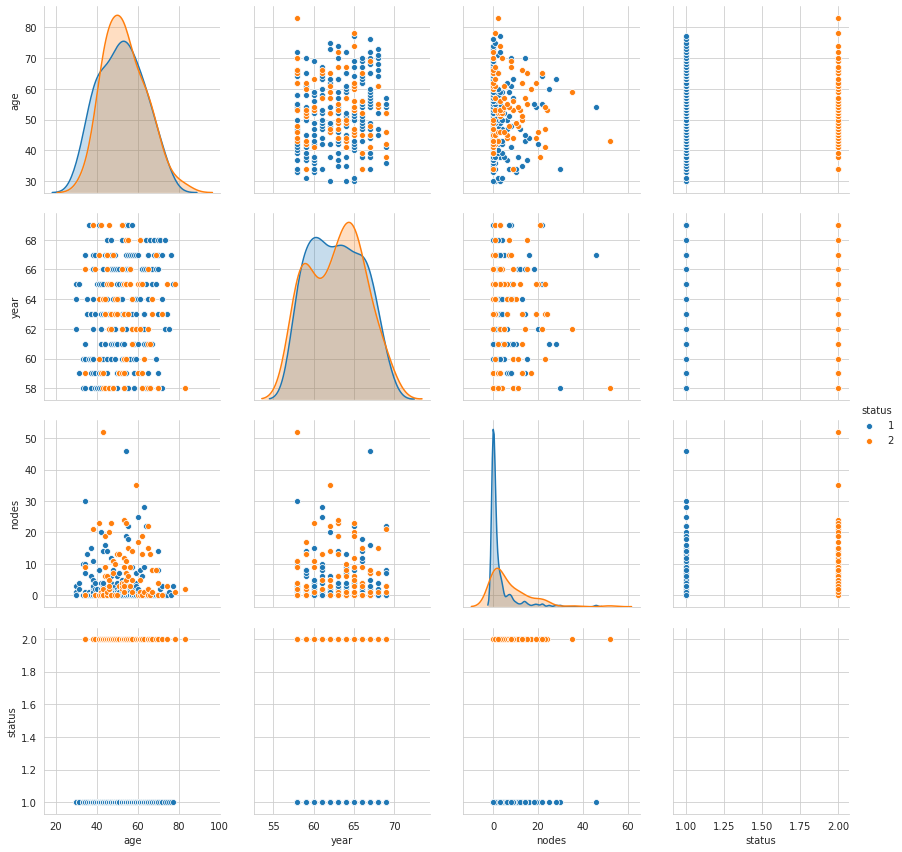

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid");
sns.pairplot(data, hue="status", size=3);
plt.show()


Conclusion :
1. if the age is above 80 there is high probablity that one will not be survived
2. if the age is nearer 30 the patient will most probably survive.
3. The age of patient is above 30
4. More number of patients are survived than not survived


* Histogram, PDF, CDF

In [0]:
survived = data.loc[data["status"] == 1]
not_survived = data.loc[data["status"] == 2]

(1) Histogram of age

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


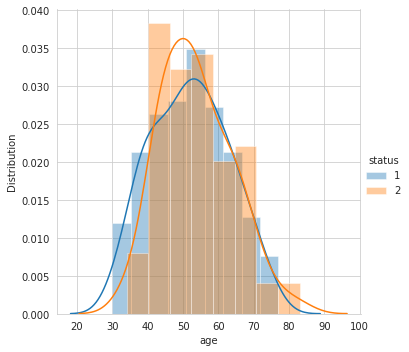

In [21]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel("Distribution")   
plt.show();

Here it seems that age has gaussian normal distribution for both the classes

(2) Histogram of year

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


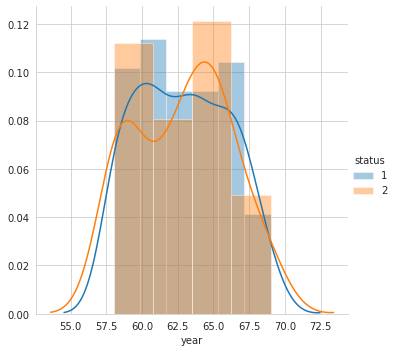

In [16]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel("Distribution")      
plt.show();

Here distributionn of year for both classes overlap on each other.

(3) Histogram of nodes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


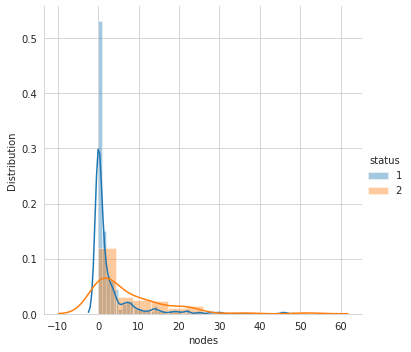

In [22]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel("Distribution")   
plt.show()

Here node has possitive skewed distribution

 * PDF and CDF
 
 (1) PDF and CDF of Age

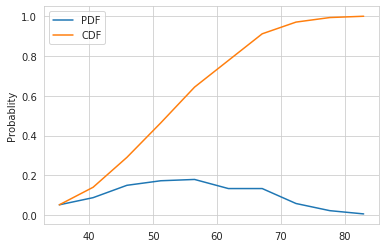

In [31]:

import numpy as np
counts, bin_edges = np.histogram(data['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
a , =plt.plot(bin_edges[1:],pdf);
b , =plt.plot(bin_edges[1:], cdf)
plt.ylabel("Probablity")
plt.legend([a,b],['PDF','CDF'])
plt.show()

(2) PDF and CDF of years

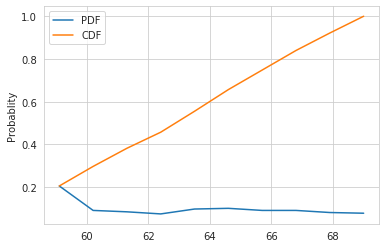

In [32]:

import numpy as np
counts, bin_edges = np.histogram(data['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
a , =plt.plot(bin_edges[1:],pdf);
b , =plt.plot(bin_edges[1:], cdf)
plt.legend([a,b],['PDF','CDF'])
plt.ylabel("Probablity")
plt.show()

(2) PDF and CDF of nodes

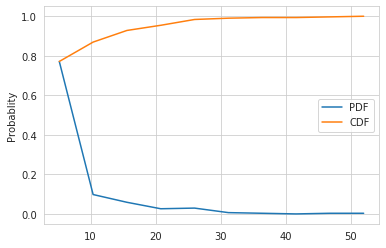

In [34]:

import numpy as np
counts, bin_edges = np.histogram(data['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
a ,=plt.plot(bin_edges[1:],pdf);
b, =plt.plot(bin_edges[1:], cdf)
plt.legend([a,b],['PDF','CDF'])
plt.ylabel("Probablity")
plt.show()

Here it seems that 85% of patients have nodes value below 10

Plot PDF and CDF for survived and not_survived.

(1) for survived


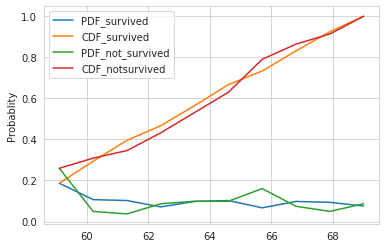

In [35]:
# survived
counts, bin_edges = np.histogram(survived['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
a, =plt.plot(bin_edges[1:],pdf)
b, =plt.plot(bin_edges[1:], cdf)


#not_survived
counts, bin_edges = np.histogram(not_survived['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
c , =plt.plot(bin_edges[1:],pdf)
d , =plt.plot(bin_edges[1:], cdf)
plt.legend([a,b,c,d],['PDF_survived','CDF_survived','PDF_not_survived','CDF_notsurvived'])
plt.ylabel("Probablity")
plt.show();

(2) for age

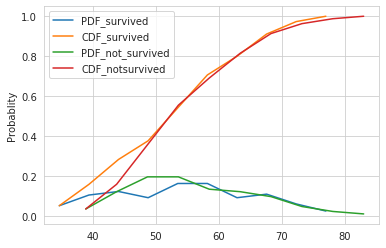

In [36]:
# survived
counts, bin_edges = np.histogram(survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
a, = plt.plot(bin_edges[1:],pdf)
b , = plt.plot(bin_edges[1:], cdf)


#not_survived
counts, bin_edges = np.histogram(not_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
c, = plt.plot(bin_edges[1:],pdf)
d, =plt.plot(bin_edges[1:], cdf)
plt.legend([a,b,c,d],['PDF_survived','CDF_survived','PDF_not_survived','CDF_notsurvived'])
plt.ylabel("Probablity")
plt.show();

(3) for nodes

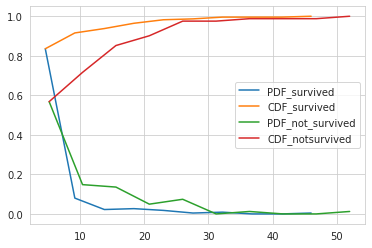

In [37]:

counts, bin_edges = np.histogram(survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
a , =plt.plot(bin_edges[1:],pdf)
b , =plt.plot(bin_edges[1:], cdf)


#not_survived
counts, bin_edges = np.histogram(not_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
c,= plt.plot(bin_edges[1:],pdf)
d ,=plt.plot(bin_edges[1:], cdf)
plt.legend([a,b,c,d],['PDF_survived','CDF_survived','PDF_not_survived','CDF_notsurvived'])

plt.show();

* Mean ,variance and standard daviation

In [19]:
#Mean
print("Means:")
print("Survived")
print("Average of age" , np.mean(survived["age"]))
print("Average of year" , np.mean(survived["year"]))
print("Average of nodes" , np.mean(survived["nodes"]))

print("Not survived")
print("Average of age" , np.mean(not_survived["age"]))
print("Average of year" , np.mean(not_survived["year"]))
print("Average of nodes" , np.mean(not_survived["nodes"]))


Means:
Survived
Average of age 52.01777777777778
Average of year 62.86222222222222
Average of nodes 2.7911111111111113
Not survived
Average of age 53.67901234567901
Average of year 62.82716049382716
Average of nodes 7.45679012345679


In [0]:
#Medians

print("Median of age " , np.median(data["age"]))
print("Median of year " , np.median(data["year"]))
print("Median of nodes " , np.median(data["nodes"]))

Median of age  52.0
Median of year  63.0
Median of nodes  1.0


In [0]:
# Quantiles
print("Quantiles of age" , np.percentile(data["age"],np.arange(0, 100, 25)))
print("Quantiles of year" , np.percentile(data["year"],np.arange(0, 100, 25)))
print("Quantiles of nodes" , np.percentile(data["nodes"],np.arange(0, 100, 25)))

Quantiles of age [30.   44.   52.   60.75]
Quantiles of year [58.   60.   63.   65.75]
Quantiles of nodes [0. 0. 1. 4.]


In [0]:
#90th Percentiles
print("90th percentile of age" , print(np.percentile(data["age"],90)))
print("90th percentile of year" , print(np.percentile(data["year"],90)))
print("90th percentile of nodes" , print(np.percentile(data["nodes"],90)))

67.0
90th percentile of age None
67.0
90th percentile of year None
13.0
90th percentile of nodes None


In [0]:
from statsmodels import robust
print ("Median Absolute Deviation")
print("MAD of age ",robust.mad(data["age"]))
print("MAD of year",robust.mad(data["year"]))
print("MAD of nodes",robust.mad(data["nodes"]))

Median Absolute Deviation
MAD of age  11.860817748044816
MAD of year 4.447806655516806
MAD of nodes 1.482602218505602


* Boxplot

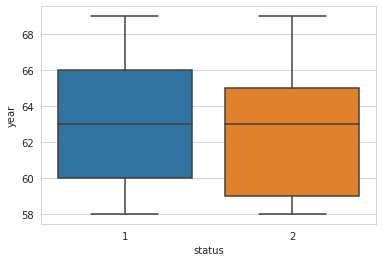

In [38]:

sns.boxplot(x='status',y='year', data=data)
plt.show()

Here both the class has same almost distribution

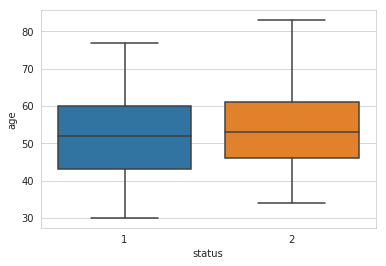

In [0]:
sns.boxplot(x='status',y='age', data=data)
plt.show()

Here both the class has almost same distribution

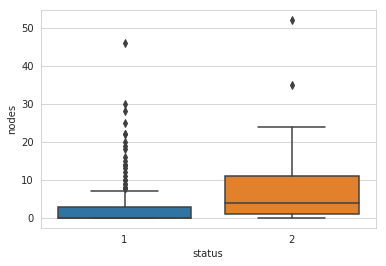

In [0]:
sns.boxplot(x='status',y='nodes', data=data)
plt.show()

nodes has more spread for not_survived class.

* Violin plot

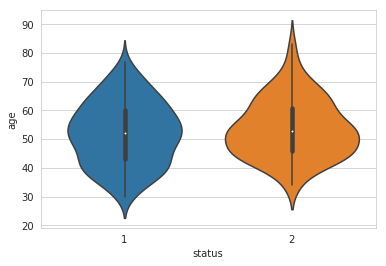

In [0]:

sns.violinplot(x="status", y="age", data=data, size=8)
plt.show()

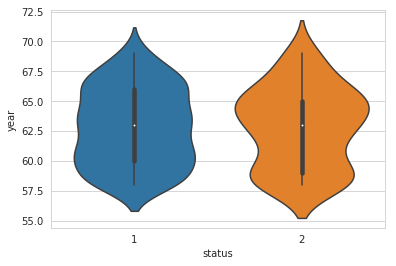

In [0]:
sns.violinplot(x="status", y="year", data=data, size=8)
plt.show()

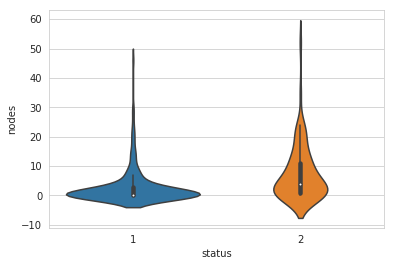

In [0]:
sns.violinplot(x="status", y="nodes", data=data, size=8)
plt.show()

Conclusion :
1. if the age is above 80 there is high probablity that one will not be survived
2. if the age is nearer 30 the patient will most probably survive.
3. The age of patient is above 30
4. More number of patients are survived than not survived
5. Age has gaussian normal distribution.
6. Node has possitive skewed distribution.
7. Here it seems that 85% of patients have nodes value below 10
